# 1. Install Dependencies and Setup

In [2]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Nusla\AppData\Local\Temp\pip-install-trn5cdf3\tensorflow-gpu_96397535a342403d8c0d111a5b3124ba\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [3]:
%pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.0.1
click                        8.1.3
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
distlib                      0.3.6
executing                    1.2.0
filelock                     3.9.0
Flask                        2.2.3
flatbuffers                  23.1.21
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.16.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.8.0
idna


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

C:\Users\Nusla\AppData\Local\Temp\ipykernel_15140\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [127]:
data_dir = 'D:/OneDrive/Desktop/Data/img_data/train' 

In [128]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [129]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [130]:
import numpy as np
from matplotlib import pyplot as plt

In [133]:
data = tf.keras.utils.image_dataset_from_directory('D:/OneDrive/Desktop/Data/img_data/train')

Found 435 files belonging to 2 classes.


In [138]:
data_iterator = data.as_numpy_iterator()

In [139]:
batch = data_iterator.next()

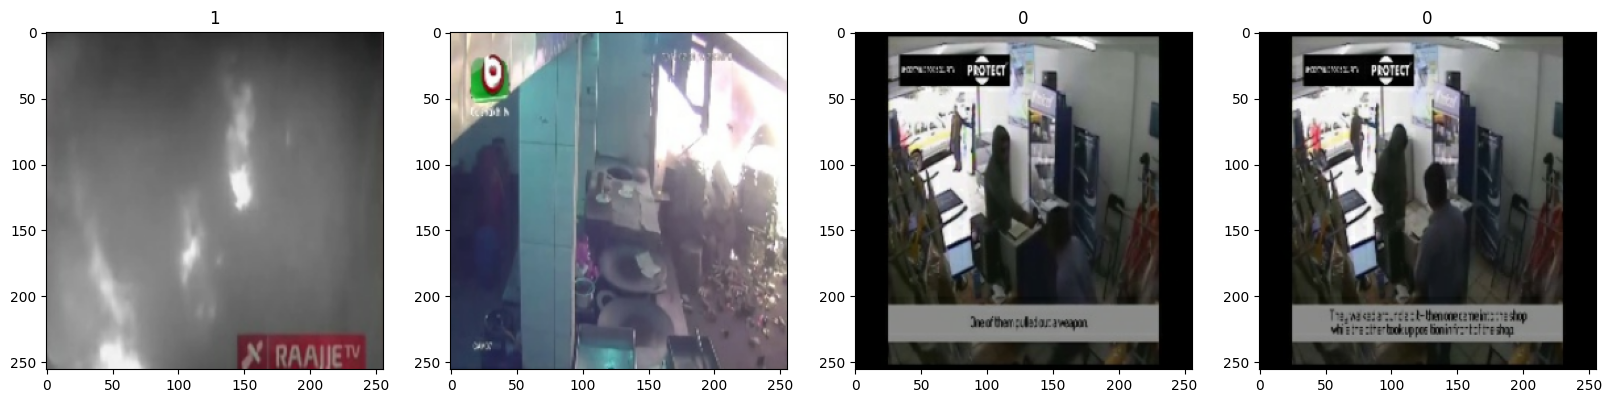

In [140]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [141]:
data = data.map(lambda x,y: (x/255, y))

In [142]:
data.as_numpy_iterator().next()

(array([[[[0.1764706 , 0.18039216, 0.14901961],
          [0.28480393, 0.29191175, 0.2509804 ],
          [0.33406863, 0.34460783, 0.30147058],
          ...,
          [0.7987745 , 0.8105392 , 0.7830882 ],
          [0.797549  , 0.8093137 , 0.78186274],
          [0.8039216 , 0.8156863 , 0.7882353 ]],
 
         [[0.28161764, 0.2855392 , 0.25416666],
          [0.2294424 , 0.23655024, 0.19561887],
          [0.20880821, 0.21934743, 0.17621017],
          ...,
          [0.79240197, 0.8041667 , 0.7767157 ],
          [0.790579  , 0.8023437 , 0.77489275],
          [0.7943627 , 0.8061274 , 0.77867645]],
 
         [[0.23848039, 0.24240196, 0.21102941],
          [0.34422487, 0.35133272, 0.31040135],
          [0.43771446, 0.4482537 , 0.4051164 ],
          ...,
          [0.795481  , 0.80724573, 0.77979475],
          [0.7906556 , 0.8024203 , 0.77496934],
          [0.7894608 , 0.8012255 , 0.7737745 ]],
 
         ...,
 
         [[0.2901961 , 0.2901961 , 0.2901961 ],
          [0.28163

# 5. Split Data

In [143]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.25)
test_size = int(len(data)*.05)

In [144]:
train_size

9

In [145]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [146]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [148]:
model = Sequential()

In [149]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [150]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [152]:
logdir='logs'

In [154]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [155]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 24s 2s/step - loss: 0.7687 - accuracy: 0.6354 - val_loss: 0.4793 - val_accuracy: 0.9375
Epoch 2/20
9/9 [==============================] - 18s 2s/step - loss: 0.4391 - accuracy: 0.9062 - val_loss: 0.3027 - val_accuracy: 0.9167
Epoch 3/20
9/9 [==============================] - 18s 2s/step - loss: 0.2589 - accuracy: 0.9062 - val_loss: 0.1662 - val_accuracy: 0.9479
Epoch 4/20
9/9 [==============================] - 18s 2s/step - loss: 0.1895 - accuracy: 0.9340 - val_loss: 0.1443 - val_accuracy: 0.9688
Epoch 5/20
9/9 [==============================] - 17s 2s/step - loss: 0.1155 - accuracy: 0.9653 - val_loss: 0.1240 - val_accuracy: 0.9479
Epoch 6/20
9/9 [==============================] - 17s 2s/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.0719 - val_accuracy: 0.9792
Epoch 7/20
9/9 [==============================] - 15s 2s/step - loss: 0.0938 - accuracy: 0.9653 - val_loss: 0.0497 - val_accuracy: 0.9792
Epoch 8/20
9/9 [==================

# 8. Plot Performance

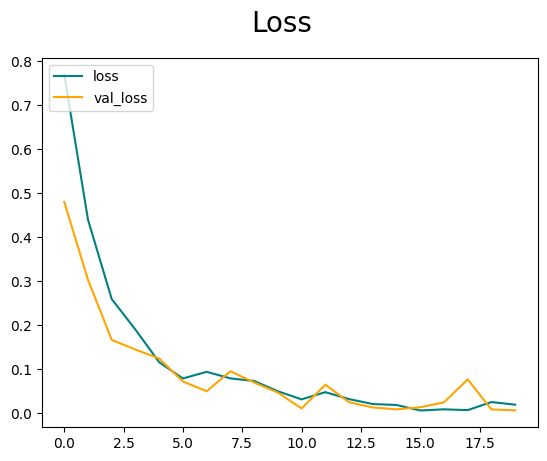

In [156]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

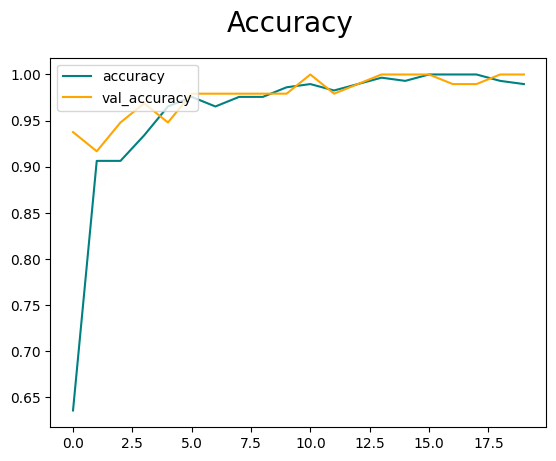

In [157]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [163]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [164]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [165]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [166]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [167]:
import cv2

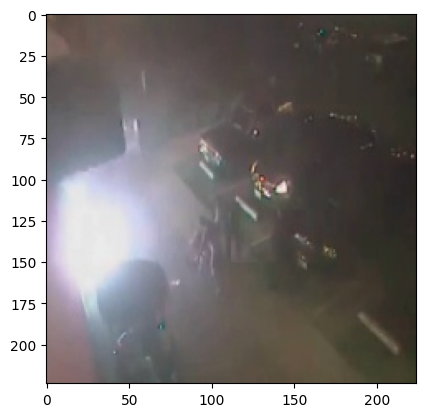

In [179]:
img = cv2.imread('D:/OneDrive/Desktop/Data/img_data/test/fire/img_110.jpg')
plt.imshow(img)
plt.show()

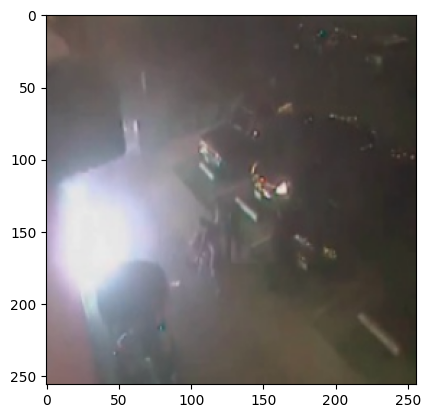

In [180]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [181]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [205]:
yhat

array([[0.8392269]], dtype=float32)

In [207]:
global indication  

if yhat > 0.5: 
    indication=True
else:
    indication=False
indication

True

# 11. Save the Model

In [208]:
from tensorflow.keras.models import load_model

In [210]:
model.save(os.path.join('models','CNNmodel.h5'))

In [211]:
new_model = load_model('C:/Users/Nusla/FireProtector/ImageClassification/models/CNNmodel.h5')

In [212]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


array([[0.8392269]], dtype=float32)

In [213]:
%pip install tflite-model-maker

^C
Note: you may need to restart the kernel to use updated packages.


In [214]:
import tensorflow.keras as keras

model = keras.models.load_model('C:/Users/Nusla/FireProtector/ImageClassification/models/CNNmodel.h5')

In [215]:
import tensorflow as tf
from tensorflow import lite

# Convert the model
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('fmodel.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmp3yi8k64a\assets


INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmp3yi8k64a\assets


In [216]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the optimized model
with open('Finalmodel.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmpkjfi7o4p\assets


INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmpkjfi7o4p\assets
